# Juno III - Projeto Jupiter 2023

Launched at Spaceport America Cup 2023 edition.
Projeto Jupiter is a rocket design team from the University of São Paulo, Brazil.
Permission to use flight data given by Juliana Carloni, 2023.

These results were extracted out of the flight card:

1. Team number: `138`
2. Launch date: `June 23rd, 2023. around 17hrs local time`
3. Last simulated apogee before flight: `3026.054 m`
4. Official recorded apogee: `3213 m`

If we divided the simulation error (3213 - 3026.054) and divide by the actual
apogee, we have a relative error of `8.08%`


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor
from rocketpy.simulation.flight_data_importer import FlightDataImporter

plt.style.use("seaborn-v0_8-colorblind")

In [3]:
env = Environment(
    latitude=32.939377,
    longitude=-106.911986,
    elevation=1480,
)

In [4]:
env.set_date(date=(2023, 6, 23, 17), timezone="America/Denver")

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/spaceport_america_pressure_levels_2023_hourly.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 6000


Gravity Details

Acceleration of gravity at surface level:    9.7910 m/s²
Acceleration of gravity at   6.000 km (ASL): 9.7771 m/s²


Launch Site Details

Launch Date: 2023-06-23 23:00:00 UTC | 2023-06-23 17:00:00 America/Denver
Launch Site Latitude: 32.93938°
Launch Site Longitude: -106.91199°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 321254.52 W    3646188.36 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1480.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 6.000 km
Reanalysis Time Period: from 2023-06-19 00:00:00 to 2023-06-24 23:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 36.75° to 29.0°
Reanalysis Longitude Range: From -108.87999725341797° to -105.12999725341797°

Surface Atmospheric Conditions

Surface Wind Speed: 244.23 m/s
Surface Wind Direction: 64.23°
Surface Wind Heading: 10.77°
Surface Pressure: 849.92 hPa
Surface Temperature: 306.95 K
Surface Air Density: 0.965 kg/m³
Sur

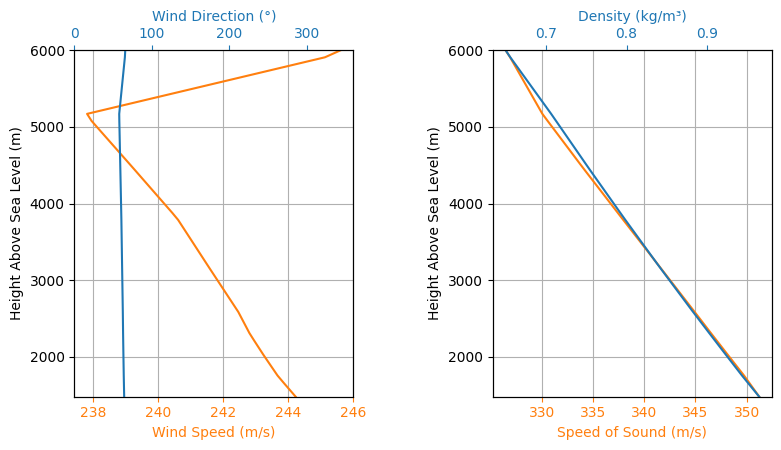

In [5]:
env.info()

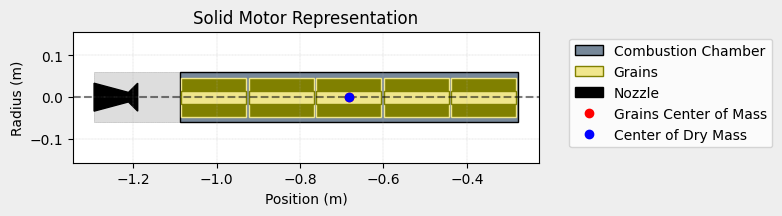

In [7]:
mandioca = SolidMotor(
    thrust_source="../../data/motors/projeto-jupiter/mandioca_thrust_curve.csv",
    reshape_thrust_curve=(5.8, 8800),
    grain_number=5,
    grain_separation=0.006,
    grain_outer_radius=0.0465,
    grain_initial_inner_radius=0.016,
    grain_initial_height=0.156,
    grain_density=1748.9,
    nozzle_radius=0.0335,
    throat_radius=0.0114,
    interpolation_method="linear",
    dry_mass=0.00000000001,
    grains_center_of_mass_position=-0.683,
    center_of_dry_mass_position=-0.683,
    dry_inertia=(0.0000000000001, 0.0000000000001, 0.0000000000001),
    nozzle_position=-1.294,
)
mandioca.draw()

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.006 m
Grain Density: 1748.9 kg/m3
Grain Outer Radius: 0.0465 m
Grain Inner Radius: 0.016 m
Grain Height: 0.156 m
Grain Volume: 0.001 m3
Grain Mass: 1.634 kg

Motor Details
Total Burning Time: 5.8 s
Total Propellant Mass: 8.169 kg
Average Propellant Exhaust Velocity: 1077.193 m/s
Average Thrust: 1517.241 N
Maximum Thrust: 2472.691294388508 N at 3.26701244813278 s after ignition.
Total Impulse: 8800.000 Ns



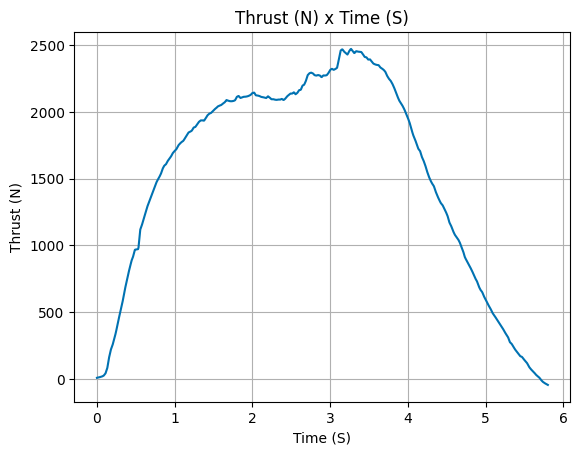

In [8]:
mandioca.info()

In [10]:
# this drag curve comes from RASAero II
drag_curve = "../../data/rockets/juno3/drag_curve.csv"

juno = Rocket(
    radius=0.0655,
    mass=24.05,
    inertia=(15.07, 15.07, 0.067),
    power_off_drag=drag_curve,
    power_on_drag=drag_curve,
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)
juno.add_motor(mandioca, 0)

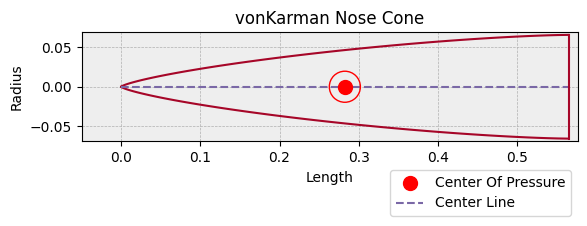

In [11]:
juno.add_nose(
    length=0.565,
    kind="vonKarman",
    position=1.477,
).draw()

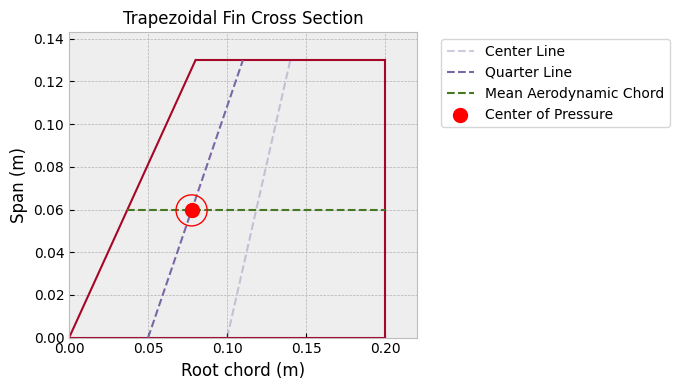

In [12]:
juno.add_trapezoidal_fins(
    n=4,
    root_chord=0.20,
    tip_chord=0.12,
    span=0.130,
    position=-0.928,
    cant_angle=0,
    airfoil=(Function([[0, 0.0002], [2, 0.3320], [4, 0.6335], [6, 0.6877]]), "degrees"),
).draw()

In [13]:
tail = juno.add_tail(
    top_radius=0.0655, bottom_radius=0.0535, length=0.068, position=-1.226
)

In [14]:
rail_buttons = juno.set_rail_buttons(
    upper_button_position=0.24,
    lower_button_position=-1.17,
    angular_position=45,
)

In [15]:
drogue = juno.add_parachute(
    "Drogue",
    cd_s=0.885,
    trigger="apogee",
    sampling_rate=105,
    noise=(0, 8.3, 0.5),
    lag=0.5,
)

In [16]:
factor = 0.38 / juno.power_off_drag(0.6)  # From CFD analysis

juno.power_on_drag *= factor
juno.power_off_drag *= factor


Inertia Details

Rocket Mass: 24.050 kg (without motor)
Rocket Dry Mass: 24.050 kg (with unloaded motor)
Rocket Loaded Mass: 32.219 kg
Rocket Inertia (with unloaded motor) 11: 15.070 kg*m2
Rocket Inertia (with unloaded motor) 22: 15.070 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.067 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0655 m
Rocket Frontal Area: 0.013478 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.294 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.683 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.173 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 9.797/rad
Tail Lift Coefficient Derivative: -0.666/rad

Center of Pr

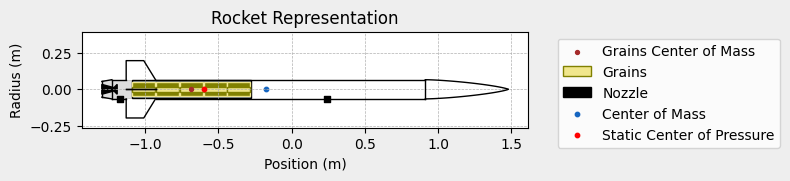

In [17]:
juno.info()
juno.draw()

In [18]:
test_flight = Flight(
    rocket=juno,
    environment=env,
    inclination=85,
    heading=105,
    rtol=1e-6,
    atol=1e-6,
    max_time=600,
    rail_length=5.2,
)


Rail Departure State

Rail Departure Time: 0.892 s
Rail Departure Velocity: 15.692 m/s
Rail Departure Stability Margin: 3.305 c
Rail Departure Angle of Attack: 35.750°
Rail Departure Thrust-Weight Ratio: 5.212
Rail Departure Reynolds Number: 1.241e+05

Burn out State

Burn out time: 5.800 s
Altitude at burn out: 2227.378 m (ASL) | 747.378 m (AGL)
Rocket speed at burn out: 243.976 m/s
Freestream velocity at burn out: 248.255 m/s
Mach Number at burn out: 0.715
Kinetic energy at burn out: 7.158e+05 J

Apogee State

Apogee Time: 26.339 s
Apogee Altitude: 4456.849 m (ASL) | 2976.849 m (AGL)
Apogee Freestream Speed: 64.569 m/s
Apogee X position: -940.492 m
Apogee Y position: -920.888 m
Apogee latitude: 32.9310960°
Apogee longitude: -106.9220619°

Impact Conditions

Time of impact: 149.025 s
X impact: 493.767 m
Y impact: -202.682 m
Altitude impact: 1480.000 m (ASL) | -0.000 m (AGL) 
Latitude: 32.9375544°
Longitude: -106.9066957°
Vertical velocity at impact: -23.531 m/s
Number of parachutes t

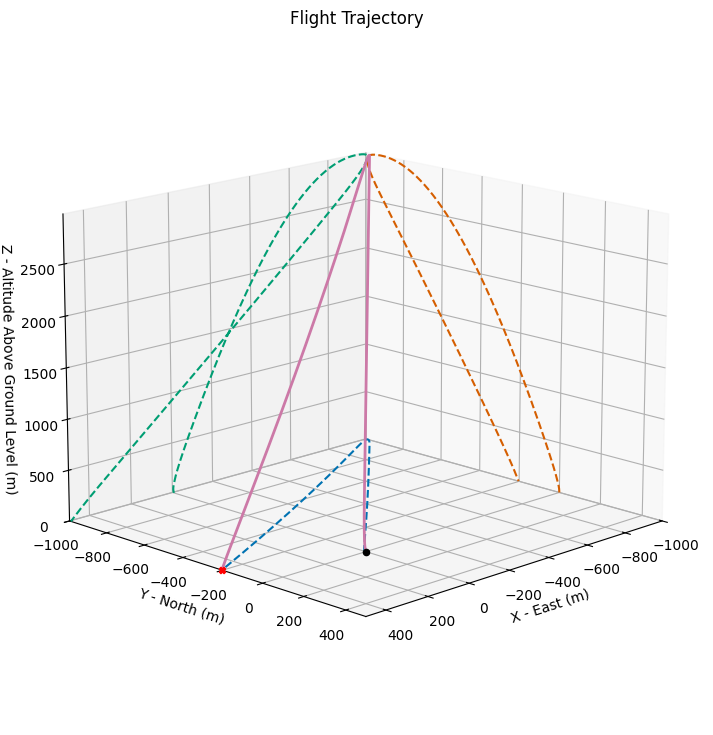

In [19]:
test_flight.prints.out_of_rail_conditions()
test_flight.prints.burn_out_conditions()
test_flight.prints.apogee_conditions()
test_flight.prints.impact_conditions()
test_flight.plots.trajectory_3d()

In [22]:
columns_map = {
    "time": "time",
    "altitude": "altitude",
    "velocity": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/juno3/cots_altimeter.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


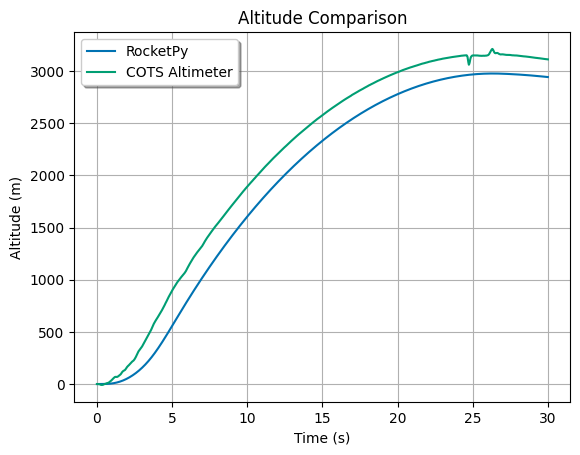

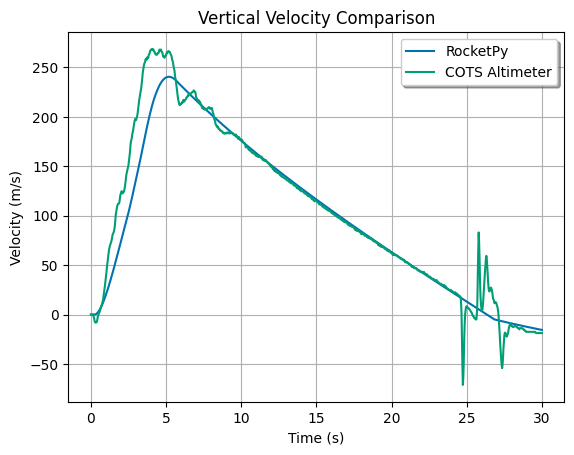

In [23]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
    lower=0,
    upper=30,
)
Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
    lower=0,
    upper=30,
)

In [25]:
columns_map = {
    "ALT": "z",
    "VERTV": "vz",
    "LAT": "latitude",
    "LON": "longitude",
}
units = {
    "ALT": "ft",
    "VERTV": "ft/s",
}

cots_gnss_flight = FlightDataImporter(
    name="COTS GNSS Flight",
    paths="../../data/rockets/juno3/cots_GNSS.csv",
    columns_map=columns_map,
    units=units,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

Attribute 'z' converted from ft to SI
Attribute 'vz' converted from ft/s to SI
The following attributes were create and are now available to be used:  ['z', 'vz', 'latitude', 'longitude']


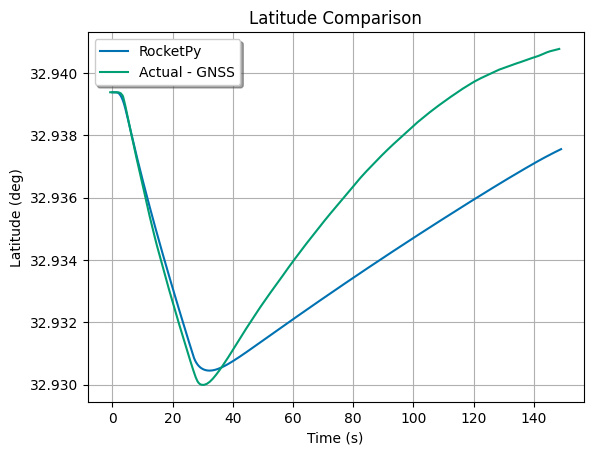

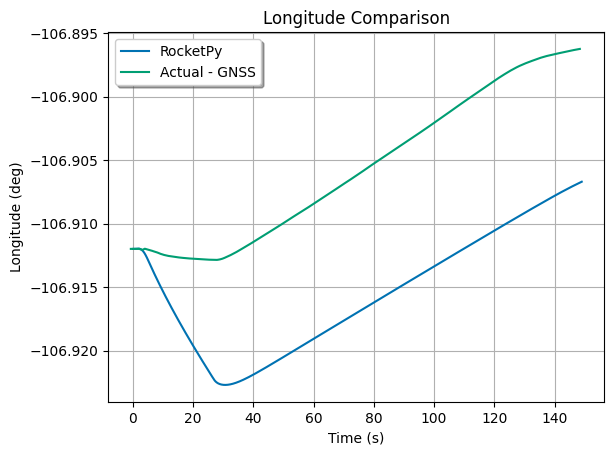

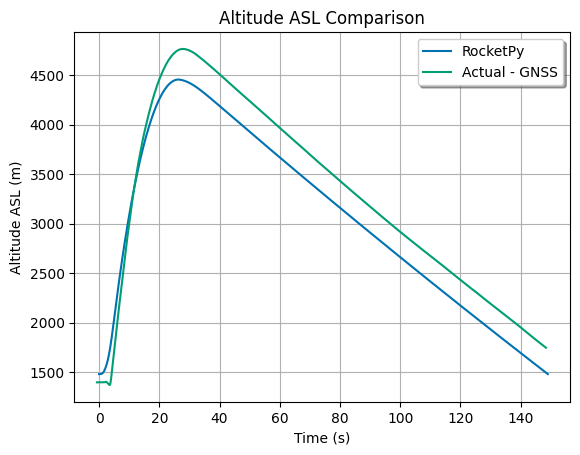

In [26]:
Function.compare_plots(
    [(test_flight.latitude, "RocketPy"), (cots_gnss_flight.latitude, "Actual - GNSS")],
    title="Latitude Comparison",
    xlabel="Time (s)",
    ylabel="Latitude (deg)",
)
Function.compare_plots(
    [
        (test_flight.longitude, "RocketPy"),
        (cots_gnss_flight.longitude, "Actual - GNSS"),
    ],
    title="Longitude Comparison",
    xlabel="Time (s)",
    ylabel="Longitude (deg)",
)
Function.compare_plots(
    [(test_flight.z, "RocketPy"), (cots_gnss_flight.z, "Actual - GNSS")],
    title="Altitude ASL Comparison",
    xlabel="Time (s)",
    ylabel="Altitude ASL (m)",
)